## Healthcare project - Persistency of a drug

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import warnings
import datetime
import calendar
from datetime import date, timedelta
warnings.filterwarnings("ignore")
import calendar

### Load the dataset

In [2]:
health_df = pd.read_excel('Healthcare_dataset.xlsx',sheet_name='Dataset')
health_df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [3]:
health_df.shape

(3424, 69)

In [4]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

### Check for null values

In [5]:
health_df.isnull().sum().sum()

0

In [6]:
health_df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

### Check for duplicate values

In [7]:
health_df.duplicated().sum()

0

##### There are no null values in the dataset and no need of handling missing values.
##### There are no duplicated data in this dataset.

### Understanding the data

#### Target Analysis

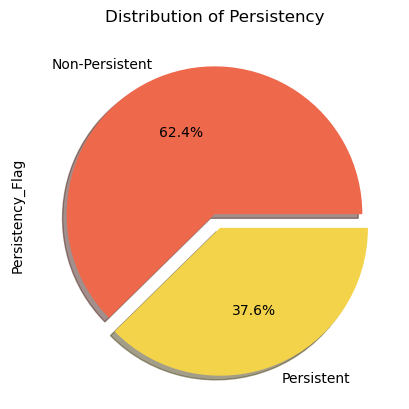

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

colors = ['#ee684b','#f3d34a']

#plot the pie chart to understand the percentage of Persistent and Non-Persistent
health_df.Persistency_Flag.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, 
                                                   colors=colors).set(title='Distribution of Persistency')
plt.show()

##### There are 37.6% of patients are persistent in taking prescription drugs while 62.4% are non persistent.

### Understanding correlation between variables

<Axes: >

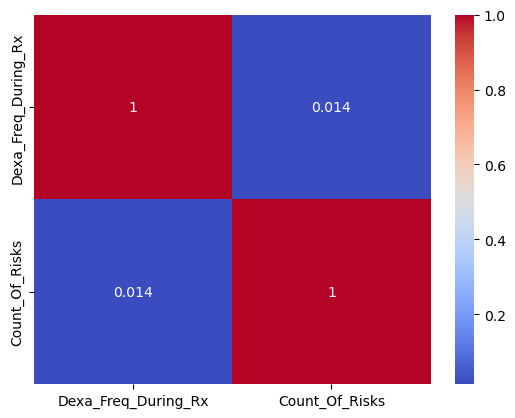

In [9]:
sns.heatmap(health_df.corr(), cmap="coolwarm", annot=True)

#### There are only 2 numeric values Number of DEXA scans taken during Rx and count of risks

### Outlier Analysis

#### Now lets do Outlier analysis for 2 numeric columns Dexa_Freq_During_Rx and Count_Of_Risks

<Axes: >

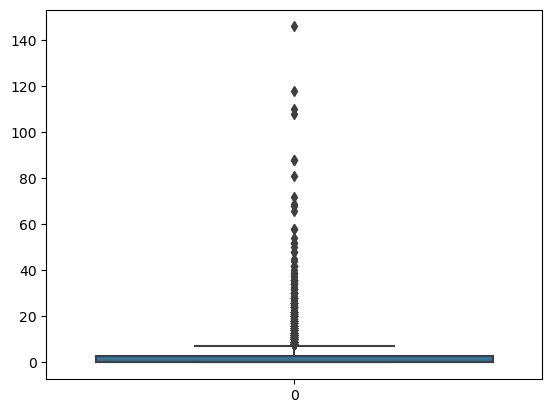

In [10]:
sns.boxplot(health_df['Dexa_Freq_During_Rx'])

#### There are many outliers for Dexa_Freq_During_Rx. So, we can now check to see skewness using Histogram

<Axes: xlabel='Dexa_Freq_During_Rx', ylabel='Count'>

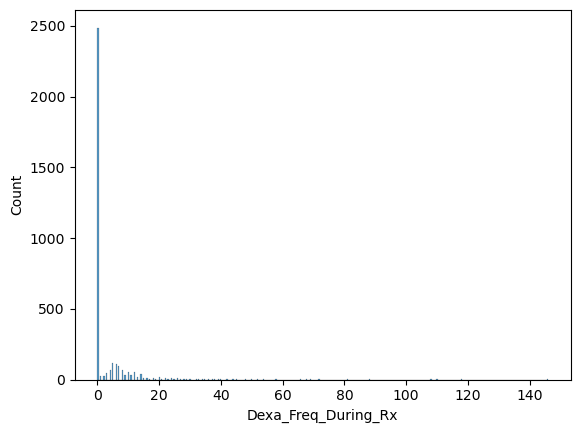

In [11]:
sns.histplot(health_df, x='Dexa_Freq_During_Rx')

#### We can clearly see that it is not normal distribution and it is right skewed data.

In [12]:
health_df.shape

(3424, 69)

### Identifying outliers using IQR and removing them.

In [13]:
Q1 = health_df['Dexa_Freq_During_Rx'].quantile(0.25)
Q3 = health_df['Dexa_Freq_During_Rx'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(health_df['Dexa_Freq_During_Rx']>=upper)[0]
lower_array = np.where(health_df['Dexa_Freq_During_Rx']<=lower)[0]
 
# Removing the outliers
health_df.drop(index=upper_array, inplace=True)
health_df.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", health_df.shape)

New Shape:  (2964, 69)


#### There are 460 outliers for Dexa_Freq_During_Rx and they are removed based on IQR.

<Axes: >

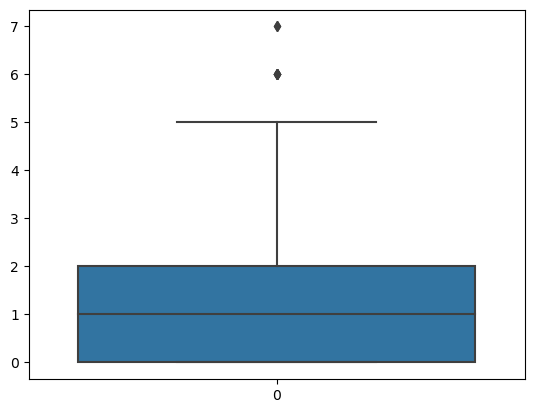

In [14]:
sns.boxplot(health_df['Count_Of_Risks'])

#### We can clearly see there are only 2 outliers for Count of risks and the records with the values 6 and 7 are outliers.

<Axes: xlabel='Count_Of_Risks', ylabel='Count'>

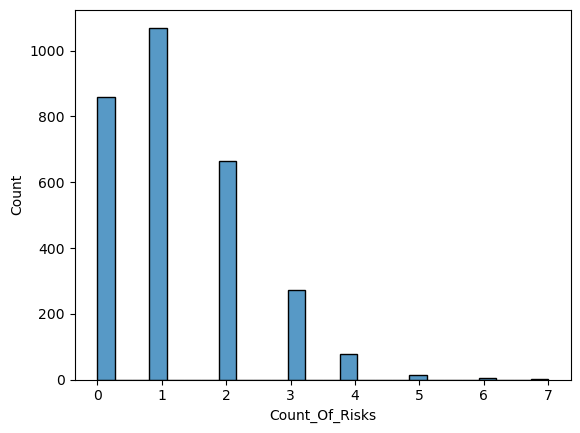

In [15]:
sns.histplot(health_df, x='Count_Of_Risks')

### Remove these outliers with values >= 5

In [16]:
health_df.Count_Of_Risks.unique()

array([0, 2, 1, 3, 4, 5, 6, 7], dtype=int64)

In [17]:
health_df = health_df[(health_df['Count_Of_Risks'] != 5)  & (health_df['Count_Of_Risks'] != 6) & (health_df['Count_Of_Risks'] != 7)]
health_df.shape

(2942, 69)

#### There are 22 outliers for count of risks with values 5,6,7 and which are removed.

### Skewness after removing outliers

<Axes: xlabel='Dexa_Freq_During_Rx', ylabel='Count'>

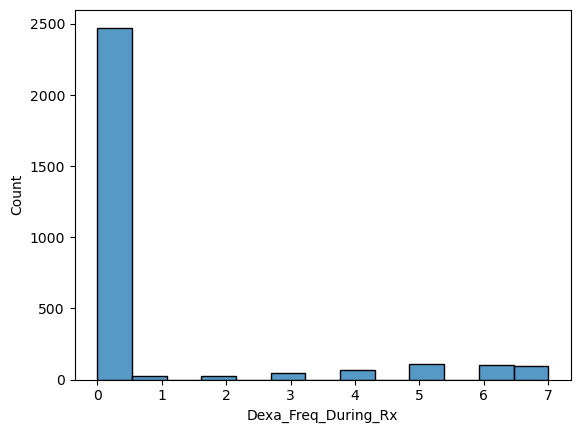

In [18]:
sns.histplot(health_df, x='Dexa_Freq_During_Rx')

In [19]:
health_df['Dexa_Freq_During_Rx'].value_counts()

0    2474
5     111
6     104
7      92
4      68
3      46
2      24
1      23
Name: Dexa_Freq_During_Rx, dtype: int64

#### They are higher number of records with 0 values, so Dexa_Freq_During_Rx is highly skewed and removing 2474 is not valid. So skewness for Dexa_Freq_During_Rx cannot be reduced. Applying different transformations will also not work for this column.

#### The skewness is high for Dexa_Freq_During_Rx

<Axes: xlabel='Count_Of_Risks', ylabel='Count'>

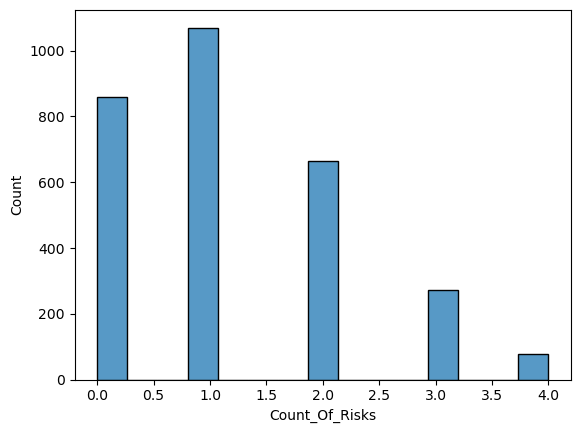

In [20]:
sns.histplot(health_df, x='Count_Of_Risks')

#### Count of risks skewness is reduced.